# get_gdps

This routine grabs the latest Global Deterministic Prediction System (GDPS) model data from MSC Datamart and outputs png plots into designated product folders for each ACMWF product.

**Datamart:**

https://eccc-msc.github.io/open-data/msc-data/nwp_gdps/readme_gdps-datamart_en/#levels

https://dd.weather.gc.ca/model_gem_global/

**Outputs:**

Mountain Weather Forecast -> *500 mbar, Surface* -> ```"mwf500"```, ```"mwfsurf"```-> TCDC SFC_0,
                                                                                      PRATE SFC_0,
                                                                                      HGT ISBL_500
                                                                                      HGT ISBL_1000

Temperatures -> *1500m 0400, 1500m 1600* -> ```"temp1504"```, ```"temp1516"``` TMP ISBL_850
                                                                               TMP TGL_2
                                                                               TMP ISBL_1015
                                                                               TMP ISBL_1000
                                                                               TMP ISBL_985
                                                                               TMP ISBL_970
                                                                               TMP ISBL_950
                                                                               TMP ISBL_925
                                                                               TMP ISBL_900
                                                                               TMP ISBL_875
                                                                               TMP ISBL_850
                                                                               TMP ISBL_800
                                                                               TMP ISBL_750
                                                                               TMP ISBL_700
                                                                               TMP ISBL_650
                                                                               TMP ISBL_600
                                                                               
                                                                               

Surface Maps -> *0-144 Hours* -> ```"surf"``` TCDC SFC_0
                                              PRATE SFC_0
                                              HGT SFC_0

500 mbar & Precipitable Water -> *500 mbar, Precipitable Water* ```"mbar500"```, ```"pwat"``` ??? 500mb winds?

**Maintenance:**

For bug reports, suggestions, inquiries, contact Andrew.Loeppky@gmail.com

In [1]:
from herbie import Herbie
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
# configure text to match AC style
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "heavy"
from toolbox import EasyMap, pc
import cartopy.crs as ccrs
import cartopy.feature as feature
import pandas as pd

from matplotlib.patches import Rectangle
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pytz
import os, shutil
import json

 ╭─▌▌Herbie─────────────────────────────────────────────╮
 │ WARNING: Unable to create config file               │
 │      /Users/andrew/.config/herbie/config.toml        │
 │ Herbie will use standard default settings.           │
 │ Consider setting env variable HERBIE_CONFIG_PATH.    │
 ╰──────────────────────────────────────────────────────╯



In [2]:
# time of last model run (0Z and 12Z)
now = pd.Timestamp.utcnow().floor("12h").tz_localize(None)

# config determines the directories in which to save each graphic
with open("..//config/gdps_config.json") as f:
    config = json.load(f)

# 10 day run (240 hours) with 3 hr spacing
tstep = range(3,243,3)
tstep = range(3,12,3)

In [3]:
def clear_directory(path):
    """
    clears all files in a directory
    """
    for name in os.listdir(path):
        full_path = os.path.join(path, name)
        if os.path.isdir(full_path):
            shutil.rmtree(full_path)
        else:
            os.remove(full_path)
    return None

In [4]:
def get_var(fxx, var, lev):
    """
    helper function to initialize herbie objects in a list comp
    """
    ds = Herbie(
            now,
            model="gdps",
            fxx=fxx,
            variable=var,
            level=lev,
        ).xarray()

    # if the variable name is unknown, assign it
    if "unknown" in ds:
        ds = ds.rename({"unknown":var})
    
    return ds

In [5]:
# heights to pull geopotentials
hgt_hgt = ["ISBL_1000",
           "ISBL_500"
          ]

In [6]:
# clear the plot folders depedent on gdps data
clear_dir = [clear_directory(file) for file in list(config["plots"].values())]
    
for fxx in tstep:
    # clear the gdps data folder
    clear_dir = [clear_directory(file) for file in list(config["data"].values())]
    
    # surface temp
    temp = get_var(fxx, "TMP", "ISBL_850")
    
    # cloud cover
    tcdc = get_var(fxx, "TCDC", "SFC_0")
    
    # precip rate
    prate = get_var(fxx, "PRATE", "SFC_0")
    
    # height
    height = xr.concat([get_var(fxx, "HGT", height) for height in hgt_hgt], dim="isobaricInhPa") # 15 min
    
    ds = xr.merge([temp, tcdc, prate, height])
ds

✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None
👨🏻‍🏭 Created directory: [/Users/andrew/data/gdps/20250531]


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F03 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None
👨🏻‍🏭 Created directory: [/Users/andrew/data/gdps/20250531]


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F06 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F09 ┊ GRIB2 @ msc ┊ IDX @ None
👨🏻‍🏭 Created directory: [/Users/andrew/data/gdps/20250531]


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F09 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F09 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F09 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=gdps ┊ product=15km/grib2/lat_lon ┊ 2025-May-31 00:00 UTC F09 ┊ GRIB2 @ msc ┊ IDX @ None


/opt/miniconda3/envs/herbie/lib/python3.13/site-packages/herbie/core.py:1117: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


<xarray.Dataset> Size: 58MB
Dimensions:              (isobaricInhPa: 2, latitude: 1201, longitude: 2400)
Coordinates:
    time                 datetime64[ns] 8B 2025-05-31
    step                 timedelta64[ns] 8B 09:00:00
  * isobaricInhPa        (isobaricInhPa) float64 16B 1e+03 500.0
  * latitude             (latitude) float64 10kB -90.0 -89.85 ... 89.85 90.0
  * longitude            (longitude) float64 19kB -180.0 -179.8 ... 179.7 179.8
    valid_time           datetime64[ns] 8B 2025-05-31T09:00:00
    gribfile_projection  object 8B None
    surface              float64 8B 0.0
Data variables:
    t                    (latitude, longitude) float32 12MB ...
    TCDC                 (latitude, longitude) float32 12MB ...
    prate                (latitude, longitude) float32 12MB ...
    gh                   (isobaricInhPa, latitude, longitude) float32 23MB 29...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   gdps
    product:                 15km/grib2/lat_lon
    description:             Canada's Global Deterministic Prediction System ...
    remote_grib:             /Users/andrew/data/gdps/20250531/CMC_glb_TMP_ISB...
    local_grib:              /Users/andrew/data/gdps/20250531/CMC_glb_TMP_ISB...
    search:                  None

In [7]:
# slice out only the domain we care about
ds = ds.sel(longitude=slice(-195, -97), latitude=slice(30, 73))

# convert precip from kg/m3/s to mm/6h
ds["prate"] *= (3600 * 6) 

# calculate 1000 - 500mb thickness
ds["thick"] = ds.gh.loc[{"isobaricInhPa":500}] - ds.gh.loc[{"isobaricInhPa":1000}] 

Text(0.35, 0.69, '500 mb\nHeight')

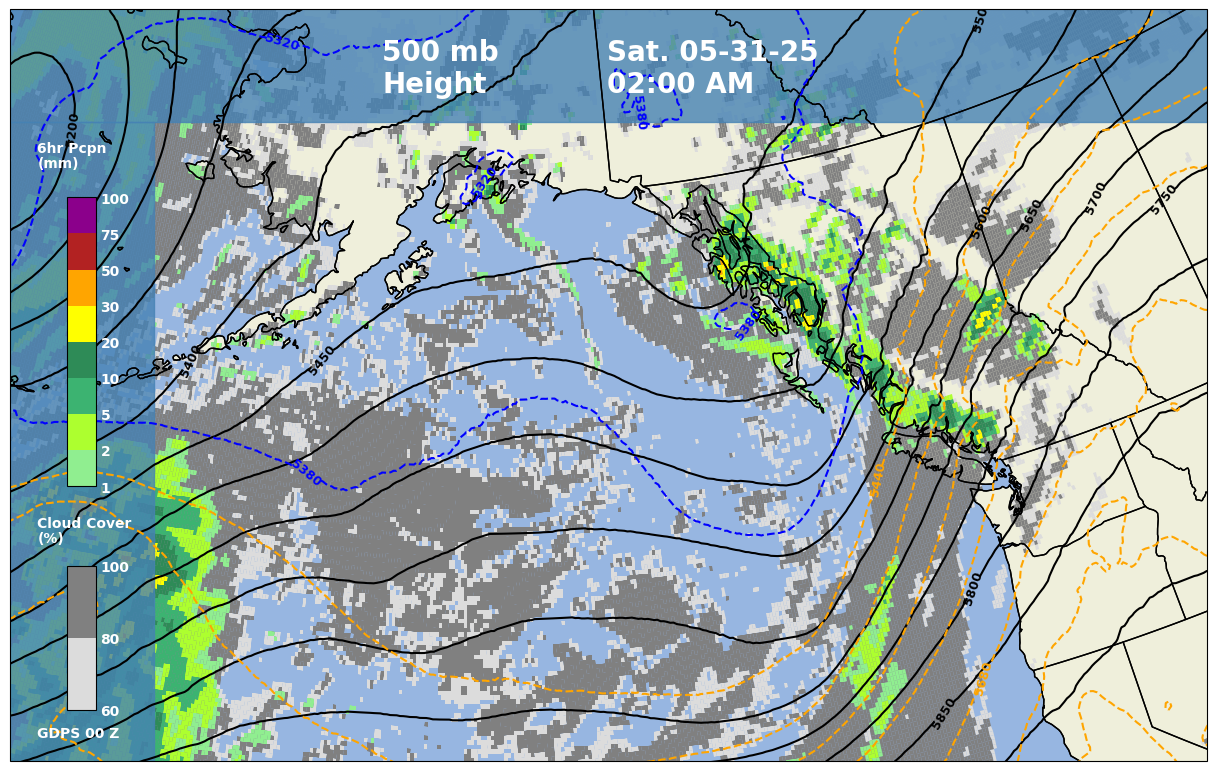

In [9]:
# make a figure
fig = plt.figure(figsize=(15,15))
fig.tight_layout()
ax = fig.add_subplot(1, 1, 1, 
                     position=(0,0,1,1), 
                     projection=ccrs.LambertConformal(central_longitude=-150, central_latitude=39.0,))
ax.set_extent([-170, -117, 40, 63])

# basemap
ax.add_feature(feature.LAND)
ax.add_feature(feature.STATES)
ax.add_feature(feature.OCEAN)
ax.add_feature(feature.COASTLINE)

# plot height contours
ht = ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh.loc[{"isobaricInhPa":500}],
    colors="k",
    transform=pc,
    levels=range(0, 6000, 50),
)
ax.clabel(ht, inline=True, fontsize=9)

# plot thickness contours
th_cmap = mpl.colors.ListedColormap(['pink',
                                     'blue',
                                     'orange',
                                    ])
th_bounds = [4800, 5100, 5400, 5700]
th_norm = mpl.colors.BoundaryNorm(th_bounds, th_cmap.N)
ht = ax.contour(
    ds.longitude,
    ds.latitude,
    ds.thick,
    cmap=th_cmap, 
    norm=th_norm,
    linestyles="dashed",
    transform=pc,
    levels=range(4000, 6000, 60),
)
ax.clabel(ht, inline=True, fontsize=9)

# plot cloud cover
cc_cmap = mpl.colors.ListedColormap(['#DCDCDC',
                                     '#808080'])
cc_bounds = [60, 80, 100]
cc_norm = mpl.colors.BoundaryNorm(cc_bounds, cc_cmap.N)
cc = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.TCDC.where(ds.TCDC >= 60),
    cmap=cc_cmap,
    norm=cc_norm,
    antialiased=True,
    transform=pc,
)

# plot precip rate
pr_cmap = mpl.colors.ListedColormap(['#90EE90',
                                     '#ADFF2F', 
                                     '#3CB371', 
                                     '#2E8B57', 
                                     '#FFFF00',
                                     '#FFA500', 
                                     '#B22222', 
                                     '#8B008B'])
pr_bounds = [1, 2, 5, 10, 20, 30, 50, 75, 100]
pr_norm = mpl.colors.BoundaryNorm(pr_bounds, pr_cmap.N)
pr = ax.pcolormesh(
     ds.longitude,
     ds.latitude,
     ds.prate.where(ds.prate >= 1),
     cmap=pr_cmap,
     norm=pr_norm,
     antialiased=True,
     transform=pc,
)

# shade out legend regions, AC style
ax.add_patch(Rectangle((0, 0), 0.12, 0.85, transform=ax.transAxes, color="steelblue", alpha=0.8))
ax.add_patch(Rectangle((0, 0.85), 1, 1, transform=ax.transAxes, color="steelblue", alpha=0.8))

# precip colorbar
fig.text(0.12, 0.65, "6hr Pcpn", color="white", size=10)
fig.text(0.12, 0.64, "(mm)", color="white", size=10)
pr_cbar = fig.colorbar(
                        pr,
                        cmap=pr_cmap, 
                        norm=pr_norm,
                        ax=ax,
                        spacing='uniform',
                        shrink=0.25,
                        location="left",
                        aspect=10,
                        anchor=(0.15,0.55),
                        pad=-0.15
                       )
pr_cbar.ax.tick_params(labelsize=10, 
                       labelcolor="white", 
                       length=0, 
                       labelright=True,
                       labelleft=False,
                      ) 

# cloud cover colorbar
fig.text(0.12, 0.40, "Cloud Cover", color="white", size=10)
fig.text(0.12, 0.39, "(%)", color="white", size=10)
cc_cbar = fig.colorbar(
                        cc,
                        cmap=cc_cmap, 
                        norm=cc_norm,
                        ax=ax,
                        spacing='uniform',
                        shrink=0.125,
                        location="left",
                        aspect=5,
                        anchor=(0.15,0.25),
                        pad=-0.18
                       )
cc_cbar.ax.tick_params(labelsize=10, 
                       labelcolor="white", 
                       length=0, 
                       labelright=True,
                       labelleft=False,
                      ) 

# timestamps
the_date = pd.Timestamp(ds.valid_time.values).tz_localize('UTC').tz_convert('America/Vancouver')
fmt_date = the_date.strftime('%a. %m-%d-%y \n%H:%M %p')
fig.text(0.5, 0.69, fmt_date, color="white", size=20)
fig.text(0.12, 0.26, f"{ds.model.upper()} {pd.Timestamp(ds.time.values).strftime("%H")} Z", color="white", size=10)

# title
fig.text(0.35, 0.69, '500 mb\nHeight', color="white", size=20)
